In [3]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import statsmodels.stats.api as sms
import numpy as np
%matplotlib inline

# Plotting Functions

In [48]:
def create_pdf(mu=0, std=1):
    x = np.linspace(-3 * std + mu, 3 * std + mu, 1000)
    y = mlab.normpdf(x, mu, std)
    return x, y

def make_plot(mu1, mu2, std1, std2, n1, n2, ci=True):
    se1 = std1/(n1 ** 0.5)
    se2 = std2/(n2 ** 0.5)
    x1, y1 = create_pdf(mu1, std1)
    x2, y2 = create_pdf(mu2, std2)
    plt.plot(x1,y1)
    plt.axvline(mu1, color='b')
    plt.plot(x2,y2)
    plt.axvline(mu2, color='g')
    if ci == True:
        plt.axvline(mu1 + (1.96 * se1), color='b', linestyle='--', alpha=0.7)
        plt.axvline(mu1 - (1.96 * se1), color='b', linestyle='--', alpha=0.7)
        plt.axvline(mu2 + (1.96 * se2), color='g', linestyle='--', alpha=0.7)
        plt.axvline(mu2 - (1.96 * se2), color='g', linestyle='--', alpha=0.7)
    return plt  

def make_samp(mu1, mu2, std1, std2, n1, n2, ci=True):
    se1 = std1/(n1 ** 0.5)
    se2 = std2/(n2 ** 0.5)
    x1, y1 = create_pdf(mu1, se1)
    x2, y2 = create_pdf(mu2, se2)
    plt.plot(x1,y1, color='dodgerblue')
    plt.axvline(mu1, color='dodgerblue')
    plt.plot(x2,y2, color='lime')
    plt.axvline(mu2, color='lime')
    if ci == True:
        plt.axvline(mu1 + (1.96 * se1), color='dodgerblue', linestyle='--', alpha=0.7)
        plt.axvline(mu1 - (1.96 * se1), color='dodgerblue', linestyle='--', alpha=0.7)
        plt.axvline(mu2 + (1.96 * se2), color='lime', linestyle='--', alpha=0.7)
        plt.axvline(mu2 - (1.96 * se2), color='lime', linestyle='--', alpha=0.7)
    return plt  

# Effect Size

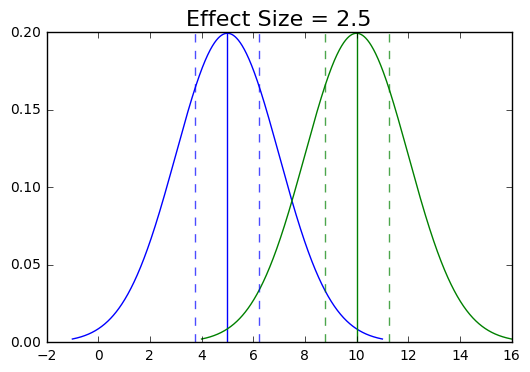

In [49]:
make_plot(mu1=5, mu2=10, std1=2, std2=2, n1=10, n2=10, ci=True)
plt.title('Effect Size = 2.5', fontsize=16);

(-2, 16)

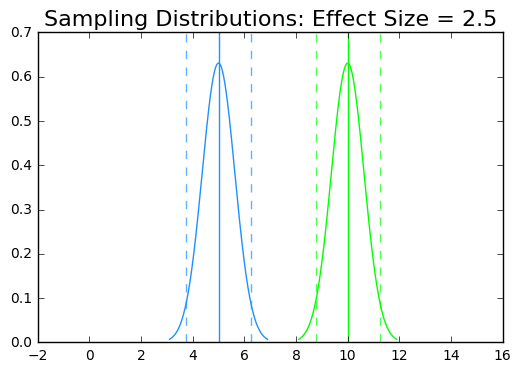

In [50]:
make_samp(mu1=5, mu2=10, std1=2, std2=2, n1=10, n2=10, ci=True)
plt.title('Sampling Distributions: Effect Size = 2.5', fontsize=16)
plt.xlim(-2,16)

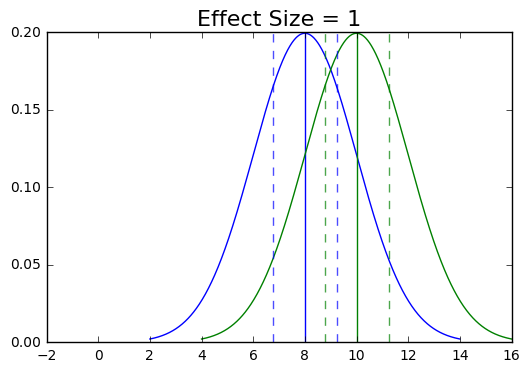

In [51]:
make_plot(mu1=8, mu2=10, std1=2, std2=2, n1=10, n2=10, ci=True)
plt.title('Effect Size = 1', fontsize=16)
plt.xlim(-2,16);

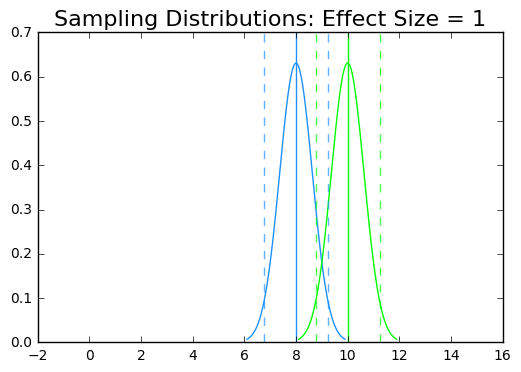

In [52]:
make_samp(mu1=8, mu2=10, std1=2, std2=2, n1=10, n2=10, ci=True)
plt.title('Sampling Distributions: Effect Size = 1', fontsize=16)
plt.xlim(-2,16);

# Standard Deviation

(-10, 25)

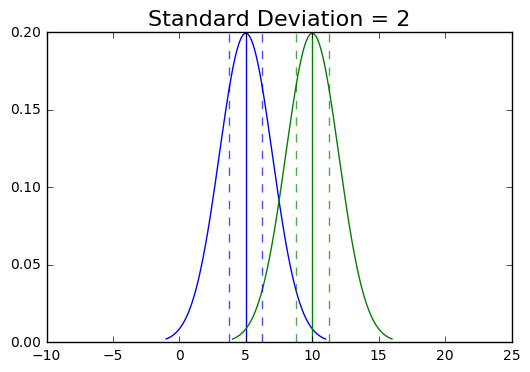

In [53]:
make_plot(mu1=5, mu2=10, std1=2, std2=2, n1=10, n2=10, ci=True)
plt.title('Standard Deviation = 2', fontsize=16);
plt.xlim(-10,25)

(-10, 25)

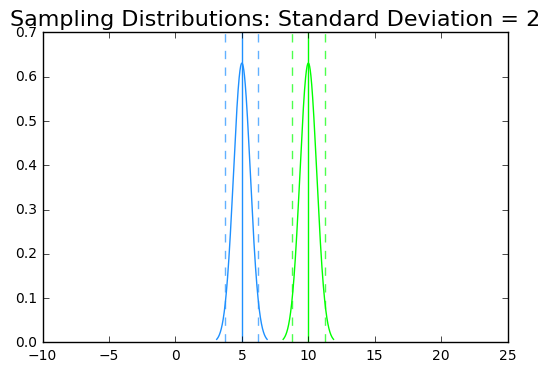

In [54]:
make_samp(mu1=5, mu2=10, std1=2, std2=2, n1=10, n2=10, ci=True)
plt.title('Sampling Distributions: Standard Deviation = 2', fontsize=16);
plt.xlim(-10,25)

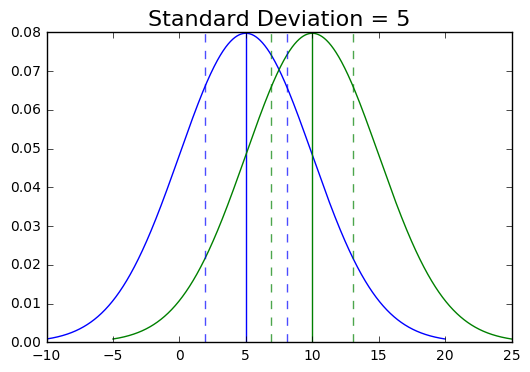

In [55]:
make_plot(mu1=5, mu2=10, std1=5, std2=5, n1=10, n2=10, ci=True)
plt.title('Standard Deviation = 5', fontsize=16);

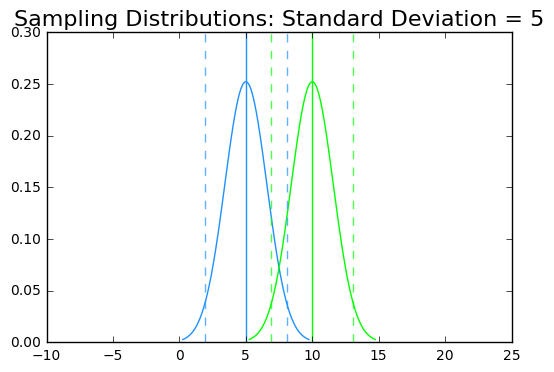

In [56]:
make_samp(mu1=5, mu2=10, std1=5, std2=5, n1=10, n2=10, ci=True)
plt.title('Sampling Distributions: Standard Deviation = 5', fontsize=16)
plt.xlim(-10,25);

# Sample Size

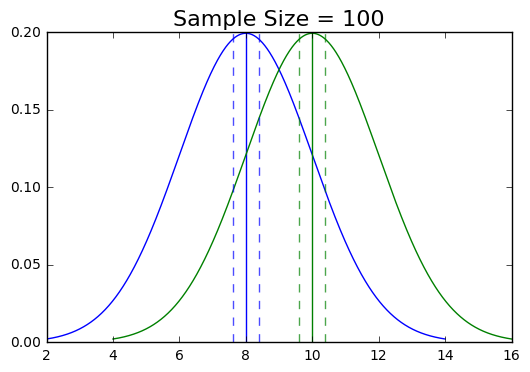

In [57]:
make_plot(mu1=8, mu2=10, std1=2, std2=2, n1=100, n2=100, ci=True)
plt.title('Sample Size = 100', fontsize=16);

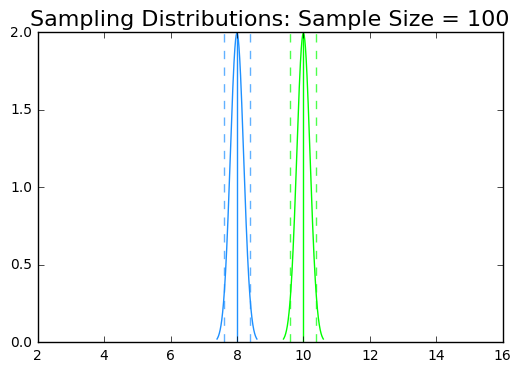

In [58]:
make_samp(mu1=8, mu2=10, std1=2, std2=2, n1=100, n2=100, ci=True)
plt.title('Sampling Distributions: Sample Size = 100', fontsize=16)
plt.xlim(2,16);

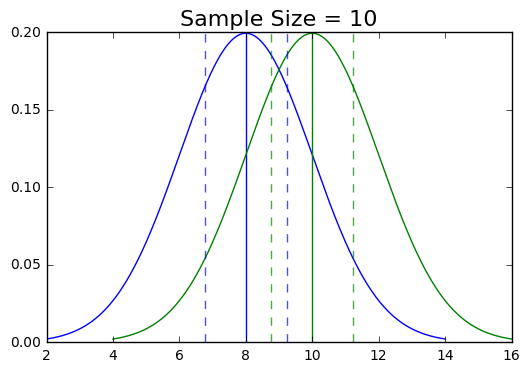

In [59]:
make_plot(mu1=8, mu2=10, std1=2, std2=2, n1=10, n2=10, ci=True)
plt.title('Sample Size = 10', fontsize=16);

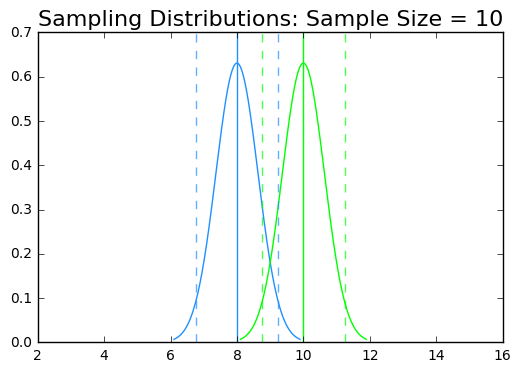

In [60]:
make_samp(mu1=8, mu2=10, std1=2, std2=2, n1=10, n2=10, ci=True)
plt.title('Sampling Distributions: Sample Size = 10', fontsize=16)
plt.xlim(2,16);

# Calculating Sample Size

In [61]:
def prop_effect_size(p1, p2):
    return sms.proportion_effectsize(p1, p2)

def mean_effect_size(mu1, mu2, std1, std2):
    pstd = ((std1 ** 2 + std2 ** 2) / 2.) ** 0.5
    return (mu1 - mu2) / pstd    

def find_n(es, power=0.8, alpha=0.05):
    return sms.NormalIndPower().solve_power(es, power=power, alpha=alpha)

In [62]:
es = mean_effect_size(mu1=8, mu2=10, std1=2, std2=2)
find_n(es)

15.697721018567242

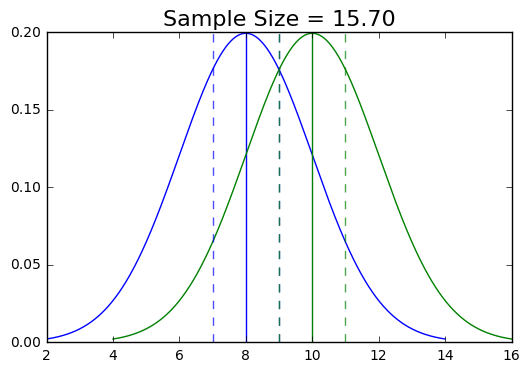

In [63]:
make_plot(mu1=8, mu2=10, std1=2, std2=2, n1=15.70, n2=15.70, ci=True)
plt.title('Sample Size = 15.70', fontsize=16);

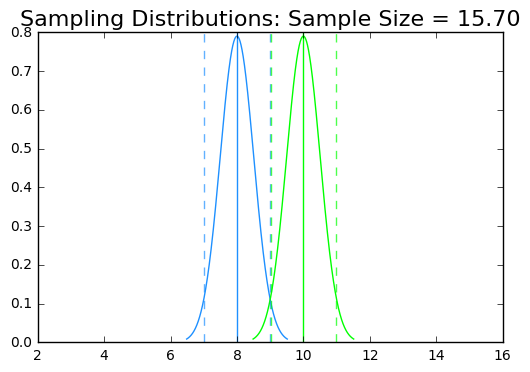

In [64]:
make_samp(mu1=8, mu2=10, std1=2, std2=2, n1=15.70, n2=15.70, ci=True)
plt.title('Sampling Distributions: Sample Size = 15.70', fontsize=16)
plt.xlim(2,16);